In [29]:
import pandas as pd
file_targets = 'data/targets_cdna.csv'
file_deg = 'data/DEG-normalized.csv'

In [30]:
df_deg = pd.read_csv(file_deg, index_col=False, sep=',', comment='#')
genes = df_deg.gene.tolist() 
print(len(genes))

3019


In [31]:
df_t = pd.read_csv(file_targets, sep='\t', header=None)
df_t.columns = ['query_seq','target','start','end','strand','score','t_align','align','q_align']
len(df_t.index)

154914

In [32]:
df_t['target_name'] = df_t['target'].str.split(" ").str[0]

In [33]:
df_deg['gene_name'] = df_deg['gene'].str.split(":").str[1]

In [37]:
vc = df_t['target_name'].value_counts()
df_count = vc.rename_axis('unique_values').reset_index(name='counts')
df_count.head()

,unique_values,counts
0,TraesCS6B02G002100,300
1,TraesCS7B02G120300,271
2,TraesCS7B02G184100,269
3,TraesCS5A02G268100,228
4,TraesCS7D02G053700,211


In [41]:
df_res = pd.merge(df_count, df_deg[['gene_name', 'log2FoldChange']], left_on='unique_values', right_on='gene_name')
df_res.head()



,unique_values,counts,gene_name,log2FoldChange
0,TraesCS6B02G002100,300,TraesCS6B02G002100,-6.133970
1,TraesCS7B02G120300,271,TraesCS7B02G120300,-1.421459
2,TraesCS7B02G184100,269,TraesCS7B02G184100,-0.638028
3,TraesCS5A02G268100,228,TraesCS5A02G268100,-1.071639
4,TraesCS7D02G053700,211,TraesCS7D02G053700,-8.645583


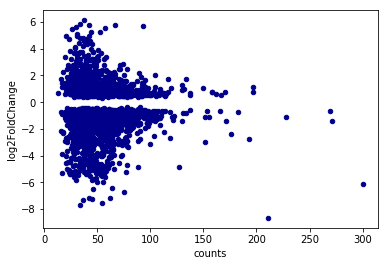

In [44]:
df_res.plot.scatter(x='counts', y='log2FoldChange',c='DarkBlue')
